# Prelude

In [1]:
from pyiron import Project
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from src import thermo, tools
%config InlineBackend.figure_format = "retina"
%matplotlib inline

In [2]:
pr = Project("FreeElectron")
# pr.unpack("FreeElectron.tar.gz")

In [3]:
al = pr.create.structure.bulk('Al', cubic=True)

In [4]:
Ts = [1, 150, 300, 450, 600, 750, 900]

In [5]:
for T in Ts:
    j = tools.run_job(pr, 'Al', al, T)

Compare the difference in eigenvalues when setting different smearing explicitely.  As argued in Xie's paper this seems to have purely a numerical effect.  0.0001 maybe Vasp's output fidelity.

In [6]:
df = tools.get_dataframe(pr)

The job Table was saved and received the ID: 8159


Loading and filtering jobs:   0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

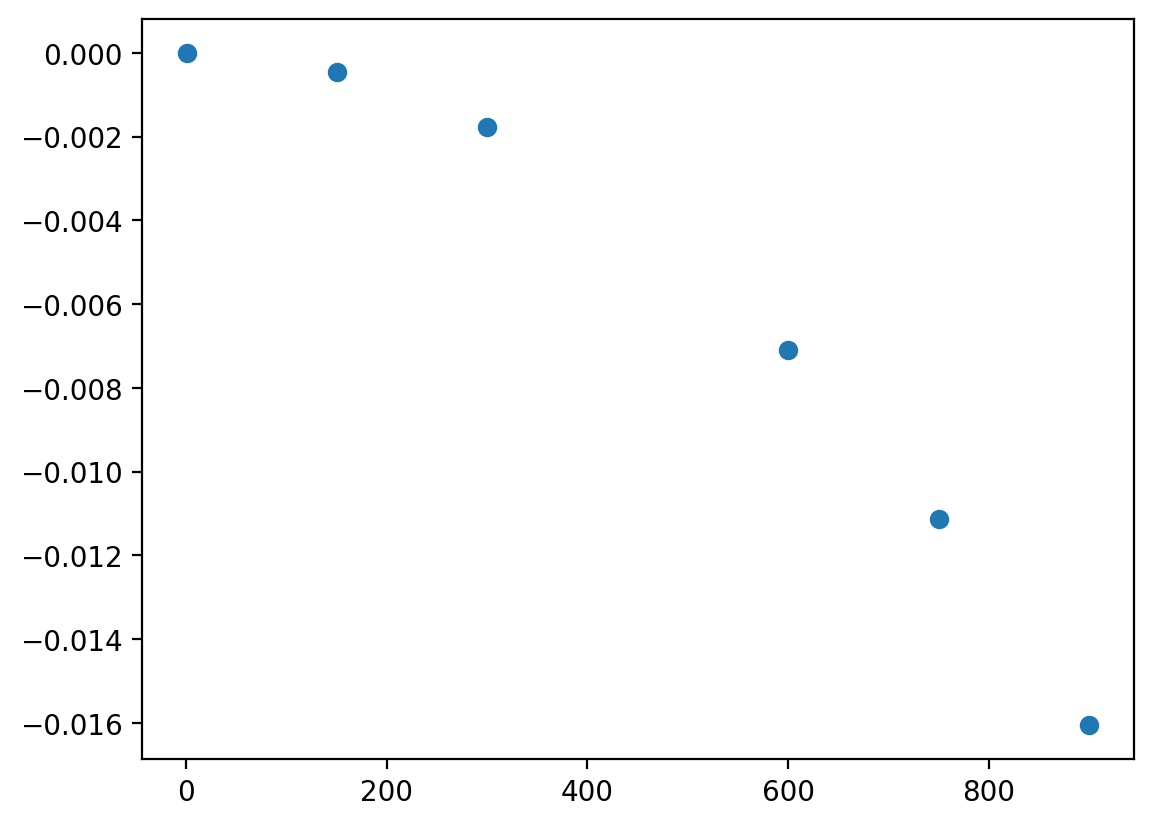

In [7]:
plt.scatter(df["T"], df.fel)

## Electronic Energies

We should have everything now to implement Xie's equations, and I tried in the functions `energy_entropy` and `electronic_entropy_from_job`, but see below there's a large offset and also different slope.
Since everything before that works, I likely get the formulas wrong.  Probably good idea to check Blazej's scripts in detail for them.

In [8]:
job = pr.load("Al_T_900")
data = thermo.get_eigenvalues(job)

In [9]:
T_range = np.linspace(0, 900, 100)
S = [thermo.get_S(data["energy"], data["density"], T, gamma=1) for T in T_range]
U = [thermo.get_U(data["energy"], data["density"], T) for T in T_range]

/home/jovyan/dev/local_projects/hackathon-2024/pyiron_hackathon/electron/src/thermo.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(((energy - fermi_energy) / kB / temperature)))


In [10]:
F = U - T_range * S

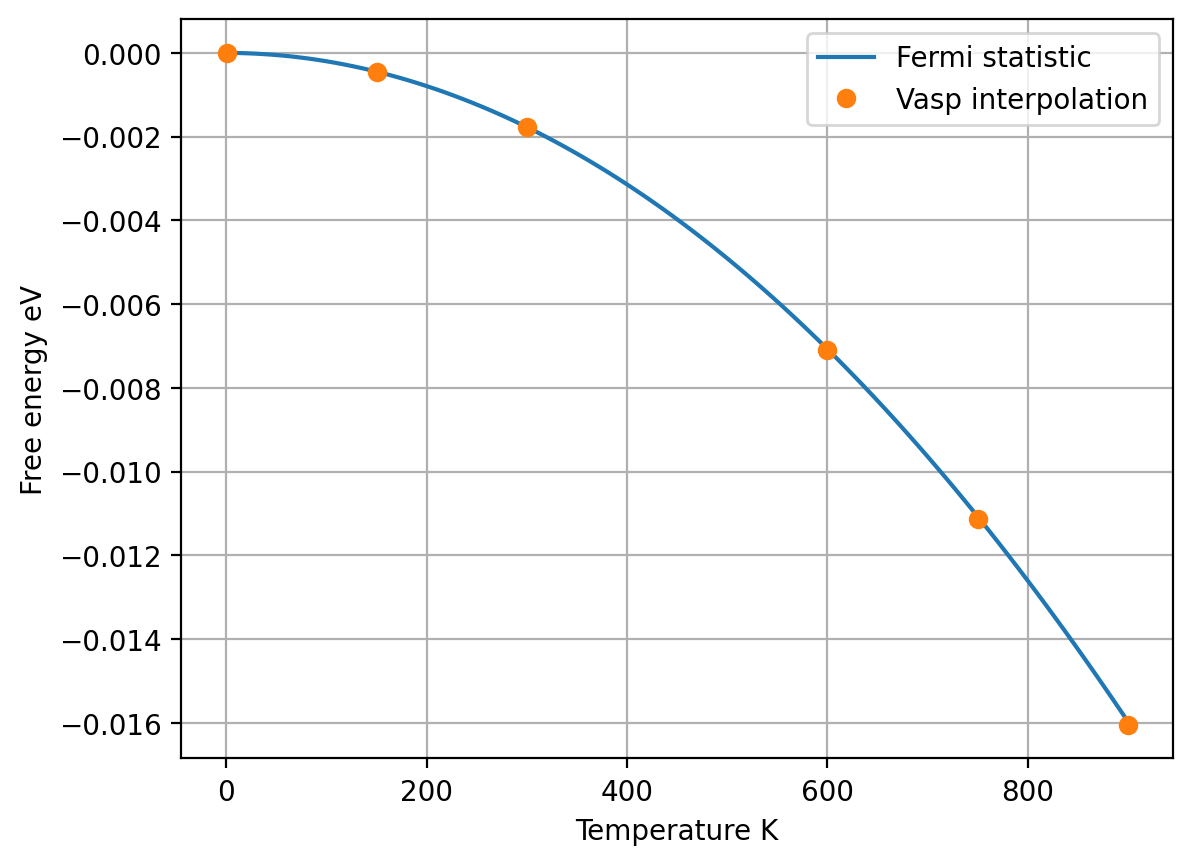

In [13]:
plt.ylabel("Free energy eV")
plt.xlabel("Temperature K")
plt.grid()
plt.plot(T_range, F, label="Fermi statistic");
plt.plot(df["T"], df.fel, "o", label="Vasp interpolation");
plt.legend();